In [31]:
from trainer import SSMTrainer
import torch as T

device = T.device("cuda" if T.cuda.is_available() else "cpu")
ssm_trainer = SSMTrainer(
    env='CartPole-v1',
    embedding_size=64,
    state_space_size=256,
    reward_threshold=15,
    reward_target=475,
    lr=2e-4,
    gamma=0.95,
    entropy_coefficient=0.02,
    validation_length=100,
    max_episode_time=500,
    strict_mode=True,
    dir='cartpole_ssm_only',
    device=device
    )

In [32]:
ssm_trainer.train()

Episode 1: Reward = 12.0
Episode 2: Reward = 30.0 | Validation Avg = 13.00 from 1 episodes 
Episode 3: Reward = 26.0 | Validation Avg = 53.00 from 1 episodes 
Episode 4: Reward = 50.0 | Validation Avg = 10.00 from 1 episodes 
Episode 5: Reward = 30.0 | Validation Avg = 9.00 from 1 episodes 
Episode 6: Reward = 10.0
Episode 7: Reward = 18.0 | Validation Avg = 9.00 from 1 episodes 
Episode 8: Reward = 34.0 | Validation Avg = 9.00 from 1 episodes 
Episode 9: Reward = 32.0 | Validation Avg = 10.00 from 1 episodes 
Episode 10: Reward = 26.0 | Validation Avg = 10.00 from 1 episodes 
Episode 11: Reward = 28.0 | Validation Avg = 9.00 from 1 episodes 
Episode 12: Reward = 11.0
Episode 13: Reward = 44.0 | Validation Avg = 10.00 from 1 episodes 
Episode 14: Reward = 18.0 | Validation Avg = 9.00 from 1 episodes 
Episode 15: Reward = 17.0 | Validation Avg = 10.00 from 1 episodes 
Episode 16: Reward = 49.0 | Validation Avg = 11.00 from 1 episodes 
Episode 17: Reward = 10.0
Episode 18: Reward = 14.0


In [33]:
ssm_trainer.replay_live()

Live Replay Episode Reward: 500.0


In [34]:
df = ssm_trainer.compile_data()

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,recurrent_block.real_transition_matrix,recurrent_block.img_transition_matrix,recurrent_block.real_hidden_matrix,recurrent_block.img_hidden_matrix,recurrent_block.embedding_layer.weight,recurrent_block.output_gate.weight,recurrent_block.input_gate.0.weight,recurrent_block.input_gate.1.smoothness,recurrent_block.discretization_matrix.0.weight,recurrent_block.discretization_matrix.1.smoothness,...,recurrent_block.state_prediction.0.bias,recurrent_block.state_prediction.1.weight,recurrent_block.state_prediction.1.bias,recurrent_block.state_prediction.3.weight,recurrent_block.state_prediction.3.bias,training_steps,training_reward,validation_reward,loss,validation_episodes
0,8.163801e-07,0.000015,0.000060,0.000032,0.030818,0.006102,0.075487,0.000541,4.827070e-06,1.504537e-07,...,0.228438,0.030576,0.029184,0.347401,0.090867,12,12.0,12.0,0.221526,0
1,1.927473e-07,0.000003,0.000007,0.000004,0.012972,0.001146,0.018669,0.000095,3.819837e-07,2.236939e-08,...,0.237473,0.031720,0.030551,0.354247,0.095090,42,30.0,13.0,-0.097627,1
2,1.934416e-07,0.000003,0.000008,0.000004,0.011621,0.000987,0.020505,0.000257,4.028249e-07,4.625425e-08,...,0.239582,0.031816,0.030419,0.354847,0.095399,68,26.0,53.0,-0.058335,1
3,1.030221e-06,0.000015,0.000017,0.000009,0.049819,0.001535,0.033676,0.000390,2.010194e-06,8.719005e-08,...,0.238596,0.034184,0.030637,0.346476,0.094586,118,50.0,10.0,-0.722015,1
4,1.574293e-07,0.000003,0.000006,0.000003,0.007634,0.000472,0.012797,0.000363,1.741869e-07,3.848585e-08,...,0.236391,0.039029,0.030657,0.372703,0.097416,148,30.0,9.0,-0.871703,1


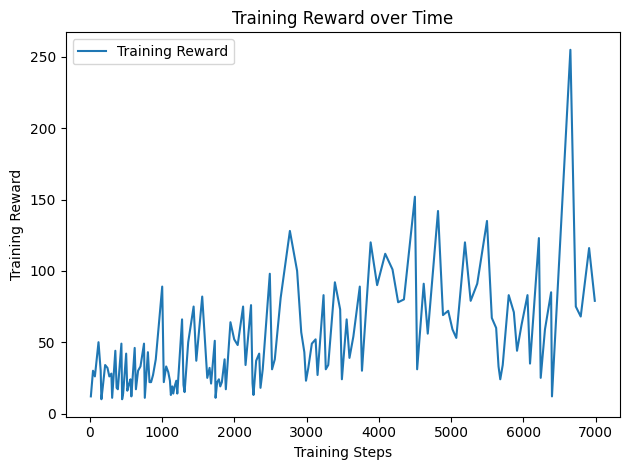

In [36]:
plt.plot(df['training_steps'], df['training_reward'], label='Training Reward', color='tab:blue')
plt.xlabel('Training Steps')
plt.ylabel('Training Reward')
plt.title('Training Reward over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

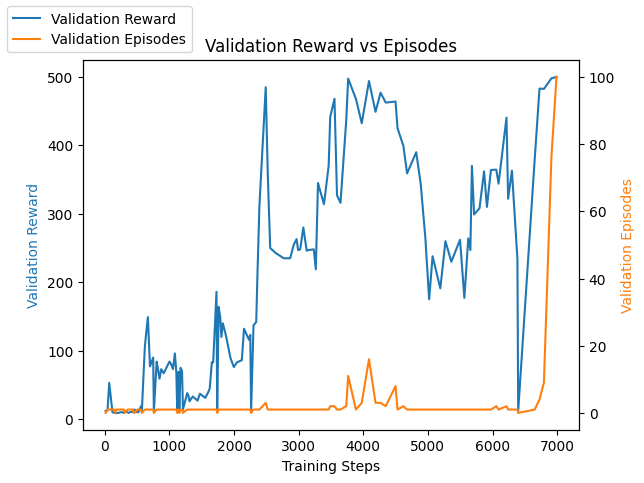

In [37]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['training_steps'], df['validation_reward'], label='Validation Reward', color='tab:blue')
ax2.plot(df['training_steps'], df['validation_episodes'], label='Validation Episodes', color='tab:orange')

ax1.set_xlabel('Training Steps')
ax1.set_ylabel('Validation Reward', color='tab:blue')
ax2.set_ylabel('Validation Episodes', color='tab:orange')

fig.legend(loc='upper left')
plt.title('Validation Reward vs Episodes')
plt.show()


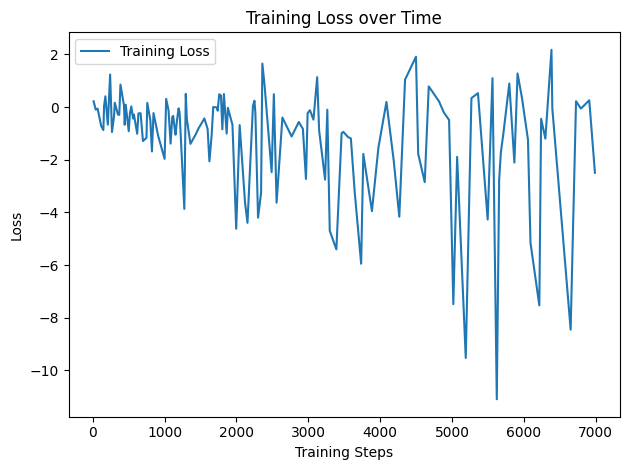

In [38]:
plt.plot(df['training_steps'], df['loss'], label='Training Loss', color='tab:blue')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

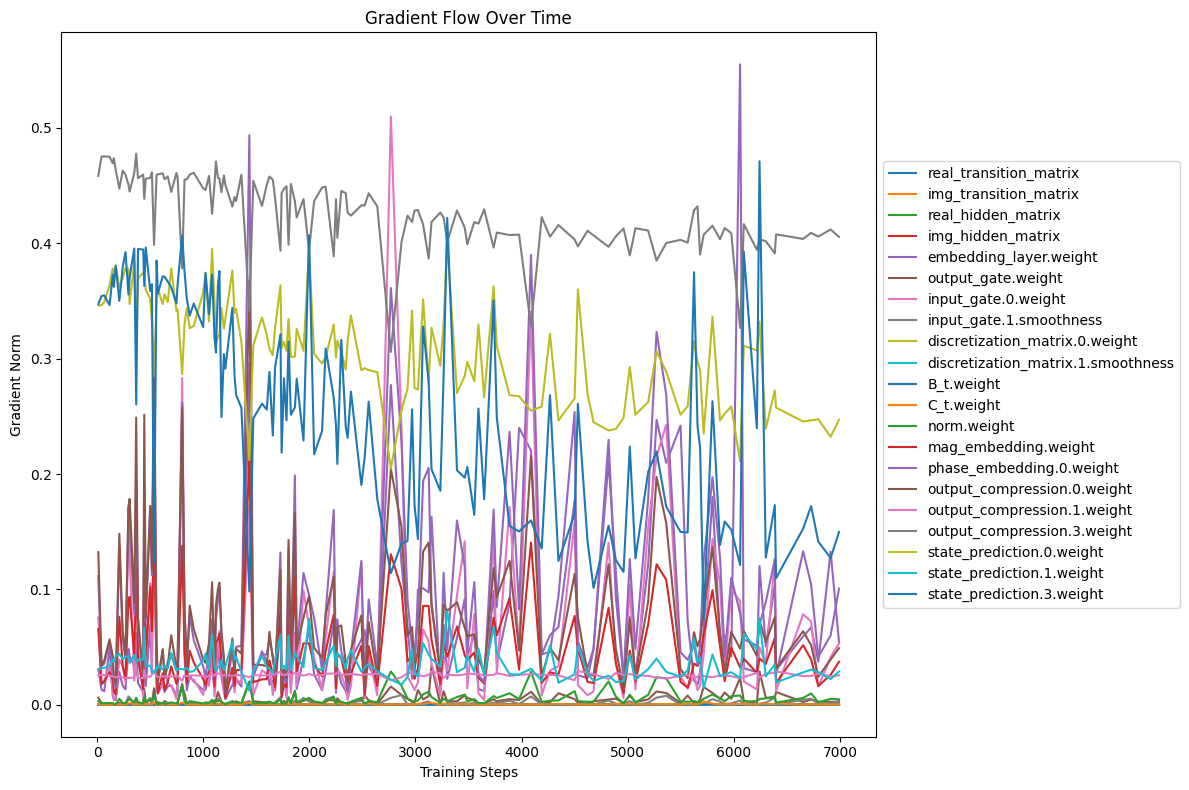

In [39]:
plt.figure(figsize=(12, 8))  # Wider plot for clarity

for gradient in ssm_trainer.gradient_data.keys():
    if 'bias' not in gradient:
        plt.plot(df['training_steps'], df[gradient], label=gradient.removeprefix('recurrent_block.'))

plt.xlabel('Training Steps')
plt.ylabel('Gradient Norm')
plt.title('Gradient Flow Over Time')

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [40]:
df['training_steps']

0        12
1        42
2        68
3       118
4       148
       ... 
135    6652
136    6727
137    6795
138    6911
139    6990
Name: training_steps, Length: 140, dtype: int64